In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
pop = pd.read_csv('./data_cleaned/population/1992_population.csv')

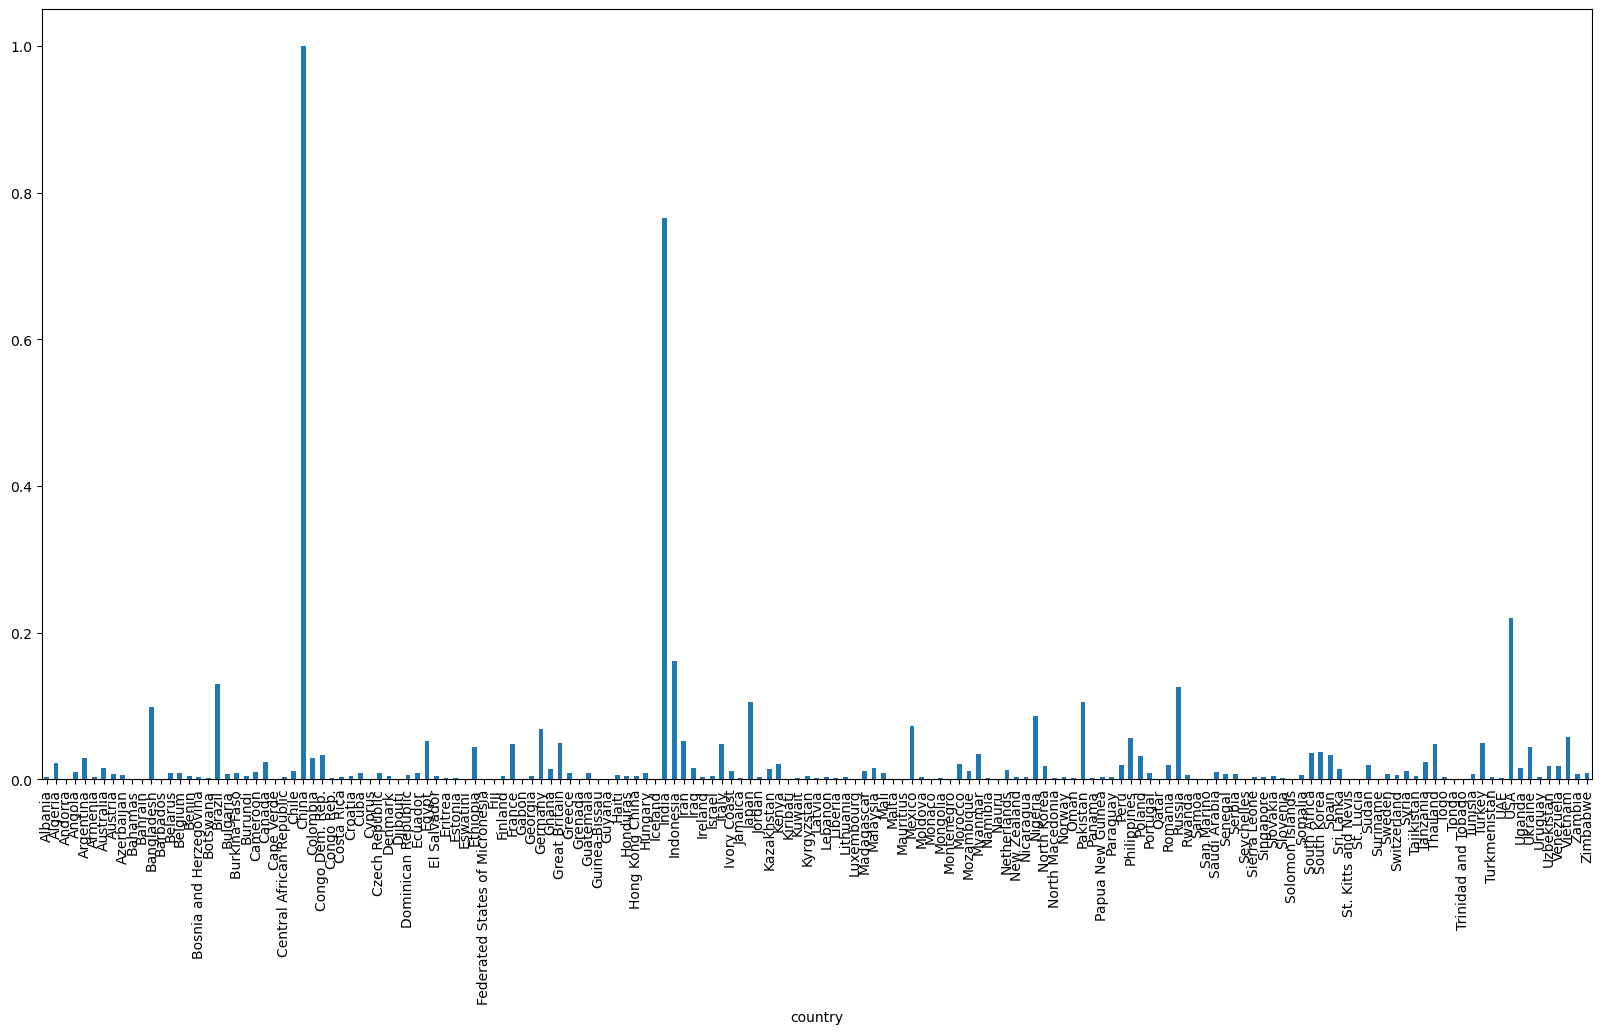

In [46]:
plot = pop.plot(x='country', y='1992', kind='bar', figsize=(20, 10), legend=False)

In [47]:
pop[pop['country'] == 'North Korea']

,country,1992
105,North Korea,0.018474


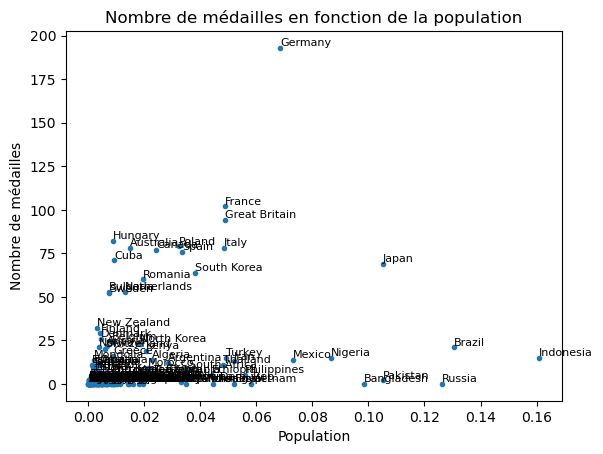

In [ ]:
'''
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données
pop = pd.read_csv('./data_cleaned/population/1992_population.csv')
medals = pd.read_csv('second_part_countries_cleaned.csv')

# Suppression de la colonne 'year' dans medals
medals = medals.drop(columns=['year'])

# Extraction de la première ligne de 'medals' et transposition
medals = medals.iloc[[0]].T  # La première ligne devient une série avec des indices (pays, ou autre)
medals.columns = ['medals']  # Renommer la colonne si nécessaire pour l'affichage

# Supposons que 'pop' a une colonne 'country' pour faire la correspondance avec medals
# Extraction de la colonne 'country' et '1992' pour la population
pop = pop[['country', '1992']]  # Utilisation de '1992' comme nom de la colonne pour la population

# Fusionner 'pop' et 'medals' sur la colonne 'country'
merged = pd.merge(pop, medals, left_on='country', right_index=True, how='inner')

# Exclure la Chine et l'Inde du DataFrame
merged = merged[~merged['country'].isin(['China', 'India', 'USA'])]

# Tracé
plt.plot(merged['1992'], merged['medals'], '.', label='Points')

# Ajouter les labels des pays
for i, country in enumerate(merged['country']):
    plt.text(merged['1992'].iloc[i], merged['medals'].iloc[i], country, fontsize=8, ha='left', va='bottom')

# Configurer l'échelle logarithmique pour l'axe des X
# plt.xscale('log')
plt.xlabel("Population")
plt.ylabel("Nombre de médailles")
plt.title("Nombre de médailles en fonction de la population")
plt.show()
'''

In [49]:
print(pop.columns)

Index(['country', '1992'], dtype='object')


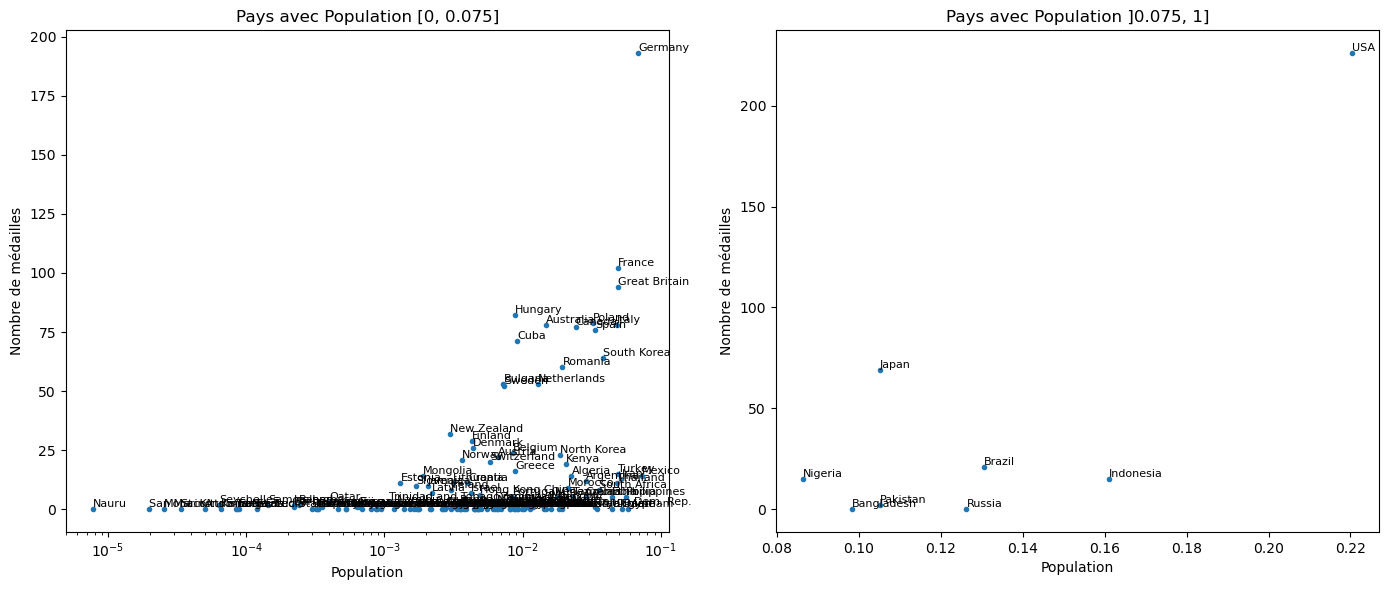

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données
pop = pd.read_csv('./data_cleaned/population/1992_population.csv')
medals = pd.read_csv('second_part_countries_cleaned.csv')

# Suppression de la colonne 'year' dans medals
medals = medals.drop(columns=['year'])

# Extraction de la première ligne de 'medals' et transposition
medals = medals.iloc[[0]].T  # La première ligne devient une série avec des indices (pays, ou autre)
medals.columns = ['medals']  # Renommer la colonne si nécessaire pour l'affichage

# Supposons que 'pop' a une colonne 'country' pour faire la correspondance avec medals
# Extraction de la colonne 'country' et '1992' pour la population
pop = pop[['country', '1992']]  # Utilisation de '1992' comme nom de la colonne pour la population

# Fusionner 'pop' et 'medals' sur la colonne 'country'
merged = pd.merge(pop, medals, left_on='country', right_index=True, how='inner')

# Exclure la Chine et l'Inde du DataFrame
merged = merged[~merged['country'].isin(['China', 'India'])]

# Créer deux sous-graphes côte à côte
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 ligne, 2 colonnes

# Filtrer les données pour la population comprise entre [0, 0.075] pour le premier graphique
merged1 = merged[merged['1992'] <= 0.075]

# Tracer le premier graphique (population entre 0 et 0.075)
axes[0].plot(merged1['1992'], merged1['medals'], '.', label='Points')
for i, country in enumerate(merged1['country']):
    axes[0].text(merged1['1992'].iloc[i], merged1['medals'].iloc[i], country, fontsize=8, ha='left', va='bottom')
axes[0].set_xscale('log')
axes[0].set_xlabel("Population")
axes[0].set_ylabel("Nombre de médailles")
axes[0].set_title("Pays avec Population [0, 0.075]")

# Filtrer les données pour la population comprise entre ]0.075, 1] pour le second graphique
merged2 = merged[merged['1992'] > 0.075]

# Tracer le deuxième graphique (population entre 0.075 et 1)
axes[1].plot(merged2['1992'], merged2['medals'], '.', label='Points')
for i, country in enumerate(merged2['country']):
    axes[1].text(merged2['1992'].iloc[i], merged2['medals'].iloc[i], country, fontsize=8, ha='left', va='bottom')
# axes[1].set_xscale('log')
axes[1].set_xlabel("Population")
axes[1].set_ylabel("Nombre de médailles")
axes[1].set_title("Pays avec Population ]0.075, 1]")

# Ajuster l'espace entre les graphiques
plt.tight_layout()
plt.show()